In [1]:
import pandas as pd
import numpy as np
from pymongo import MongoClient
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
client = MongoClient()
db = client.steam_capstone
collection = db.market
df = pd.DataFrame(list(collection.find({'app':730})))

In [10]:
df.head()

,_id,app,item_name,prices
0,5b629c758267aeaedbbb6e4a,614910,"Letters, vol. 2: L (Carrot)","[{'date': 'Jul 21 2017 01: +0', 'median_sell_p..."
1,5b629c768267aeaedbbb6e4b,614910,"Letters, vol. 2: R (Green Sea)","[{'date': 'Jul 17 2017 01: +0', 'median_sell_p..."
2,5b629c768267aeaedbbb6e4c,614910,Animalus: Whale,"[{'date': 'May 07 2017 01: +0', 'median_sell_p..."
3,5b629c778267aeaedbbb6e4d,614910,Flag: Virgin Islands,"[{'date': 'May 25 2017 01: +0', 'median_sell_p..."
4,5b629c778267aeaedbbb6e4e,614910,"Letters, vol. 3: A (Silver)","[{'date': 'Dec 07 2017 01: +0', 'median_sell_p..."


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 4 columns):
_id          1178 non-null object
app          1178 non-null int64
item_name    1178 non-null object
prices       1178 non-null object
dtypes: int64(1), object(3)
memory usage: 36.9+ KB


In [4]:
set([x[:x.find('|') - 1 if x.find('|') > 0 else None] for x in df.item_name])

{'AK-47',
 'AUG',
 'AWP',
 'Aces High Pin',
 'Atlanta 2017 Cache Souvenir Package',
 'Atlanta 2017 Challengers (Holo-Foil)',
 'Atlanta 2017 Cobblestone Souvenir Package',
 'Atlanta 2017 Dust II Souvenir Package',
 'Atlanta 2017 Legends (Holo-Foil)',
 'Atlanta 2017 Mirage Souvenir Package',
 'Atlanta 2017 Nuke Souvenir Package',
 'Atlanta 2017 Overpass Souvenir Package',
 'Atlanta 2017 Train Souvenir Package',
 'Audience Participation Parcel',
 'Autograph Capsule',
 'Baggage Pin',
 'Bestiary Capsule',
 'Bloodhound Pin',
 'Boston 2018 Attending Legends (Holo-Foil)',
 'Boston 2018 Attending Legends Autograph Capsule',
 'Boston 2018 Cache Souvenir Package',
 'Boston 2018 Cobblestone Souvenir Package',
 'Boston 2018 Inferno Souvenir Package',
 'Boston 2018 Legends (Holo-Foil)',
 'Boston 2018 Legends Autograph Capsule',
 'Boston 2018 Minor Challengers (Holo-Foil)',
 'Boston 2018 Minor Challengers Autograph Capsule',
 'Boston 2018 Minor Challengers with Flash Gaming (Holo-Foil)',
 'Boston 201

## CS:GO non-weapon items:
I split on '|' and the following strings are not stand alone in game items:
  * Starting with 'Sticker', ...
  * Ending in 'Pin', 'Case', 'Key', 'Capsule', ...

In [4]:
lst_col = 'prices'
df = pd.DataFrame({col:np.repeat(df[col].values, df[lst_col].str.len()) for col in df.columns.difference([lst_col])}).assign(**{lst_col:np.concatenate(df[lst_col].values)})[df.columns.tolist()]

In [5]:
df[['date','median_sell_price', 'quantity']] = pd.DataFrame(df.prices.values.tolist(), index= df.index)

In [6]:
df = df.drop(columns='prices')

In [7]:
df.head()

,_id,app,item_name,date,median_sell_price,quantity
0,5b629c758267aeaedbbb6e4a,614910,"Letters, vol. 2: L (Carrot)",Jul 21 2017 01: +0,0.133,1
1,5b629c758267aeaedbbb6e4a,614910,"Letters, vol. 2: L (Carrot)",Jul 23 2017 01: +0,0.130,2
2,5b629c758267aeaedbbb6e4a,614910,"Letters, vol. 2: L (Carrot)",Jul 29 2017 01: +0,0.096,1
3,5b629c758267aeaedbbb6e4a,614910,"Letters, vol. 2: L (Carrot)",Jul 30 2017 01: +0,0.102,3
4,5b629c758267aeaedbbb6e4a,614910,"Letters, vol. 2: L (Carrot)",Aug 01 2017 01: +0,0.080,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43184143 entries, 0 to 43184142
Data columns (total 6 columns):
_id                  object
app                  int64
item_name            object
date                 object
median_sell_price    float64
quantity             object
dtypes: float64(1), int64(1), object(4)
memory usage: 1.9+ GB


In [10]:
df_glock = df[(df.item_name=='Glock-18 | Weasel (Battle-Scarred)')]

In [11]:
df_plot_glock = df_glock[[x[-11:-7] == '2017' for x in df_glock.date]]

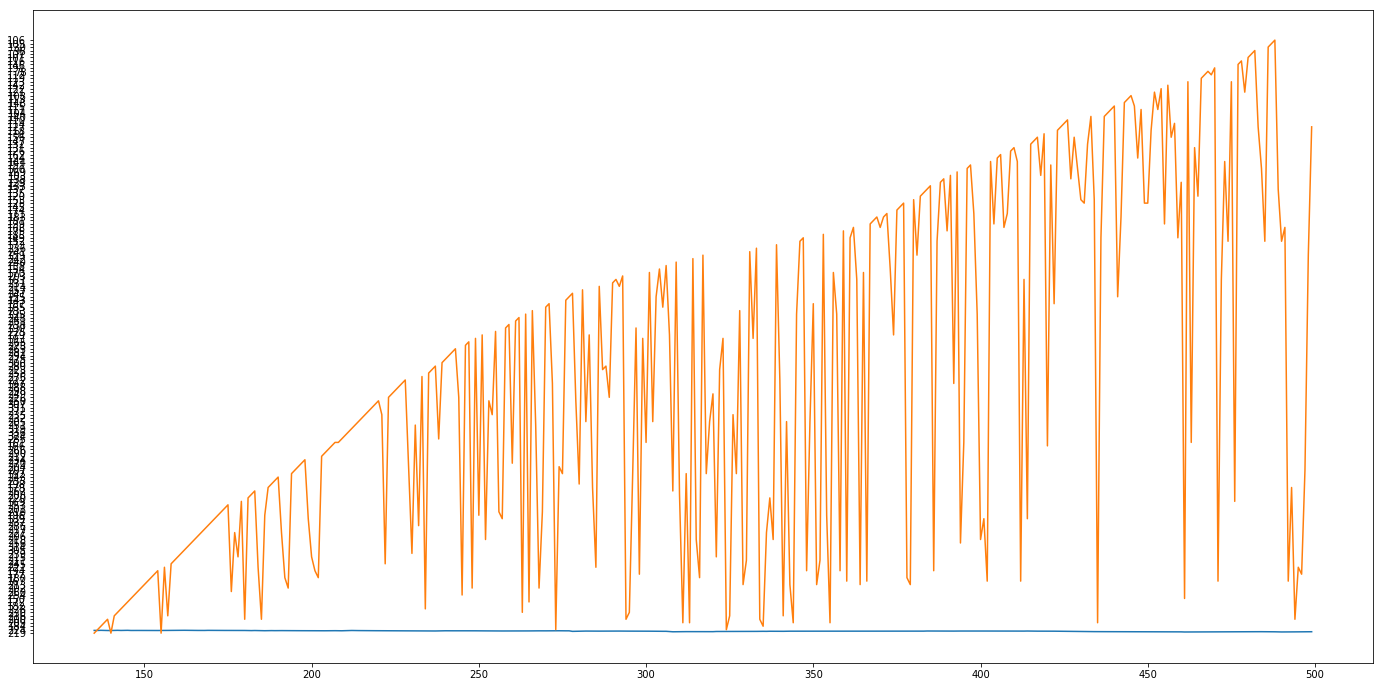

In [12]:
fig, ax = plt.subplots(figsize=(24, 12))
ax.plot(df_plot_glock.median_sell_price)
ax.plot(df_plot_glock.quantity)

In [13]:
glock_price = df_plot_glock.median_sell_price
glock_quant = df_plot_glock.quantity.values

In [14]:
glock_quant = list(map(int, glock_quant))

In [15]:
glock_price_standard = [(x-min(glock_price))/(max(glock_price) - min(glock_price)) for x in glock_price]
glock_quant_standard = [(x-min(glock_quant))/(max(glock_quant) - min(glock_quant)) for x in glock_quant]

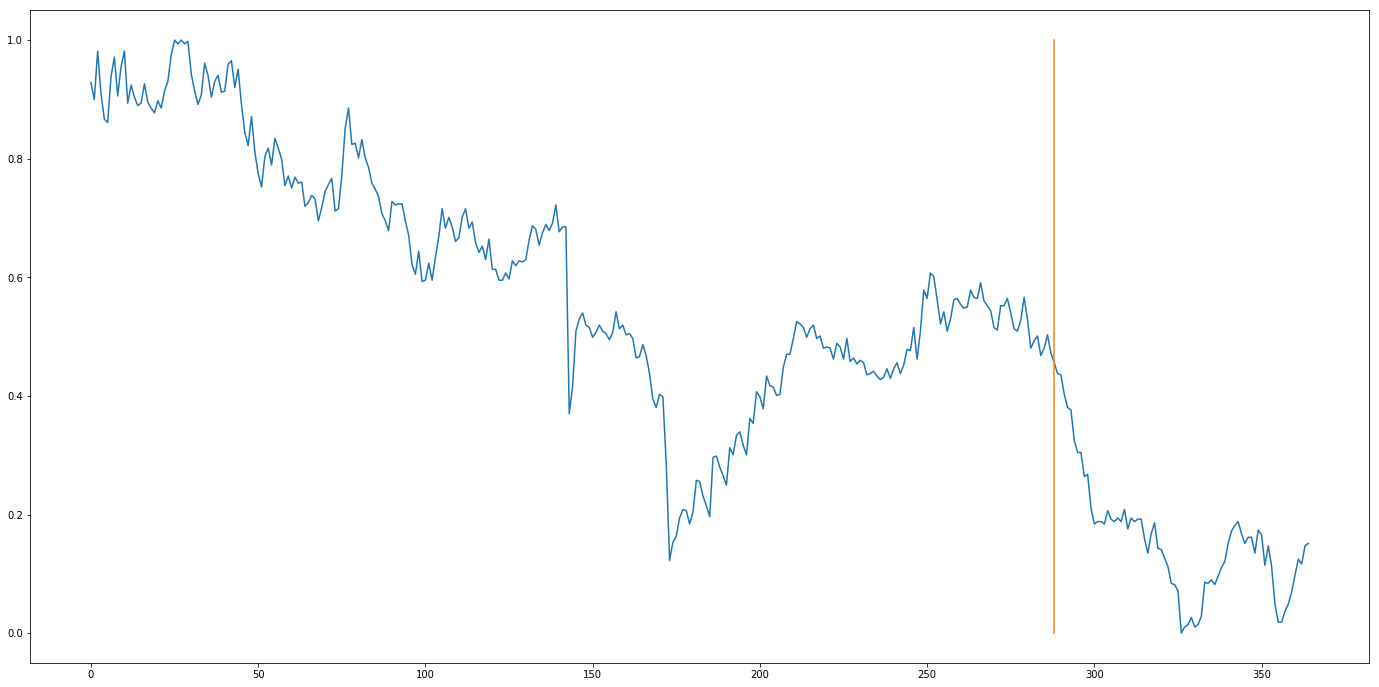

In [31]:
fig, ax = plt.subplots(figsize=(24, 12))
ax.plot(glock_price_standard)
#ax.plot(glock_quant_standard)
ax.plot([288]*2, [0,1])